1. https://www.kaggle.com/datasets/trolukovich/apparel-images-dataset?resource=download 접속
2. 파일 다운로드 받기 : archive.zip
3. archive.zip 압축풀기 :내용을 data 폴더에 저장
4. 다중레이블 데이터 : 폴더 이름이 레이블
   빨강 파랑 신발 드레드
    1    0    1    0
    1    0    0    1
    활성화 함수 : sigmoid
    손실함수 : binary_crossentropy
   다중클래스 데이터 : 다중컬럼 데이터
    신발 가방 드레스
    1     0    0
    0     1    0 
    활성화 함수 : softmax
    손실함수 : catetorical_crossentropy


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import glob

glob.glob : 파일의 목록을 리스트로 리턴
'./data/*/*.jpg' : 현재폴더의 하위폴더중 data폴더의 모든 하위폴더의 저장된
                   jpg 파일의 목록
 . : 현재폴더
 * : 모든폴더
 *.jpg : 모든 jpg 파일
recursive=True : 지정된 폴더의 하위폴더까지 검색 

In [3]:
all_data = np.array(glob.glob('./data/*/*.jpg', recursive=True))

In [4]:
len(all_data)

11385

In [5]:
all_data[:5]

array(['./data\\black_dress\\0097960878307e559459d98c9f9eaeeea0db1f94.jpg',
       './data\\black_dress\\038098f911bf30451c109d19870668c39dcf0c11.jpg',
       './data\\black_dress\\0522170fba54aa3e80914857c97ecea5cc091411.jpg',
       './data\\black_dress\\0561718aec3cca983c7397d03204c20d641f02b9.jpg',
       './data\\black_dress\\06130b80c92914dcccb56634594b4aeab7db5944.jpg'],
      dtype='<U64')

In [6]:
#다중레이블 생성을 위한 함수.
def check_cc(color, clothes): #black,dress
    labels = np.zeros(11,) #요소의 갯수가 11개, 값인 0인 배열생성
    if(color == 'black'):       labels[0] = 1
    elif(color == 'blue'):      labels[1] = 1
    elif(color == 'brown'):     labels[2] = 1
    elif(color == 'green'):     labels[3] = 1
    elif(color == 'red'):       labels[4] = 1
    elif(color == 'white'):     labels[5] = 1
    if(clothes == 'dress'):     labels[6] = 1
    elif(clothes == 'shirt'):   labels[7] = 1
    elif(clothes == 'pants'):   labels[8] = 1
    elif(clothes == 'shorts'):  labels[9] = 1
    elif(clothes == 'shoes'):   labels[10] = 1
    return labels 


In [7]:
all_labels = np.empty((all_data.shape[0], 11)) #11385행 11열 빈배열
#all_data.shape[0] : 11385
#all_data : 폴더의 이미지목록
#enumerate(리스트) : 인덱스,요소 리턴
for i, data in enumerate(all_data):
    #i : 인덱스
    #data : 요소값. 이미지의위치값
    #./data\\black_dress\\0097960878307e559459d98c9f9eaeeea0db1f94.jpg
    #all_data[i].split('\\')[1] : 폴더명.  black_dress
    color_and_clothes = all_data[i].split('\\')[1].split('_') #[black,dress]
    color = color_and_clothes[0] #black
    clothes = color_and_clothes[1] #dress
    labels = check_cc(color, clothes) #[1,0,0,0,0,0,1,0,0,0,0]
    all_labels[i] = labels; 

In [8]:
all_labels[0]

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [9]:
all_labels.shape

(11385, 11)

In [10]:
all_labels[-10:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.]])

In [11]:
#훈련데이터 테스트 데이터 분리
#shuffle = True : 섞어서 분리
#test_size = 0.3 : 훈련:테스트 = 7:3
#random_state = 99 : seed값 설정
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split\
(all_data, all_labels, shuffle = True, test_size = 0.3,random_state = 99)

In [13]:
train_x[0]  #이미지위치
test_x[0]

'./data\\black_pants\\5f990c758075f2cc2ac943b5090621546879a2f7.jpg'

In [16]:
train_x.shape 
train_y.shape

(7969, 11)

In [15]:
test_x.shape

(3416,)

In [17]:
#훈련데이터 검증데이터 분리
train_x, val_x, train_y, val_y = train_test_split\
(train_x, train_y, shuffle = True, test_size = 0.3,random_state = 99)

In [18]:
train_x.shape

(5578,)

In [20]:
val_x.shape

(2391,)

In [21]:
#훈련,검증,테스트 데이터를 csv 파일로 저장하기
train_df = pd.DataFrame(
{'image':train_x, 'black':train_y[:, 0], 'blue':train_y[:, 1],
'brown':train_y[:, 2], 'green':train_y[:, 3], 'red':train_y[:, 4],
'white':train_y[:, 5], 'dress':train_y[:, 6], 'shirt':train_y[:, 7],
'pants':train_y[:, 8], 'shorts':train_y[:, 9], 'shoes':train_y[:, 10]})

train_df.to_csv("./data/train.csv",index=None)


In [22]:
val_df = pd.DataFrame(
{'image':val_x, 'black':val_y[:, 0], 'blue':val_y[:, 1],
'brown':val_y[:, 2], 'green':val_y[:, 3], 'red':val_y[:, 4],
'white':val_y[:, 5], 'dress':val_y[:, 6], 'shirt':val_y[:, 7],
'pants':val_y[:, 8], 'shorts':val_y[:, 9], 'shoes':val_y[:, 10]})

val_df.to_csv("./data/val.csv",index=None)

In [23]:
test_df = pd.DataFrame(
{'image':test_x, 'black':test_y[:, 0], 'blue':test_y[:, 1],
'brown':test_y[:, 2], 'green':test_y[:, 3], 'red':test_y[:, 4],
'white':test_y[:, 5], 'dress':test_y[:, 6], 'shirt':test_y[:, 7],
'pants':test_y[:, 8], 'shorts':test_y[:, 9], 'shoes':test_y[:, 10]})

test_df.to_csv("./data/test.csv",index=None)

In [ ]:
#train_df.info() #훈련데이터정보 5578건
#val_df.info()   #검증데이터정보 2391건
test_df.info()   #테스트데이터정보 3416건

#restart

In [ ]:
#csv로 부터 데이터 읽기
import pandas as pd
train_df = pd.read_csv("./data/train.csv")
#train_df.info()
val_df = pd.read_csv("./data/val.csv")
#val_df.info()
test_df = pd.read_csv("./data/test.csv")
test_df.info()

In [ ]:
#원본이미지 출력
import matplotlib.pyplot as plt
img1 = plt.imread(train_df["image"][0])  #이미지데이터읽기. 
plt.imshow(img1) #이미지로출력

In [6]:
img1.shape

(474, 474, 3)

In [7]:
img1[0]

array([[255, 254, 255],
       [255, 254, 255],
       [254, 252, 253],
       ...,
       [253, 251, 252],
       [255, 254, 255],
       [255, 254, 255]], dtype=uint8)

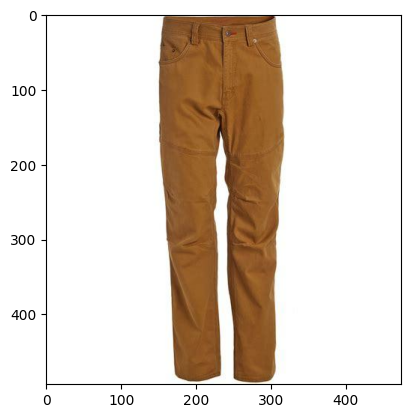

In [8]:
img2 = plt.imread(train_df["image"][1])  #이미지데이터읽기. 
plt.imshow(img2) #이미지로출력

In [9]:
img2.shape

(494, 474, 3)

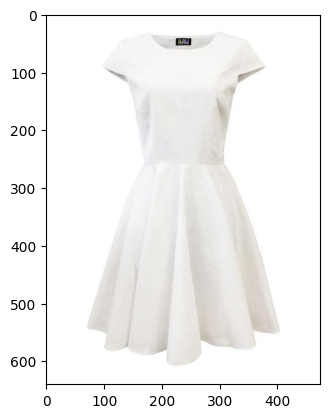

In [10]:
img3 = plt.imread(train_df["image"][2])  #이미지데이터읽기. 
plt.imshow(img3) #이미지로출력

In [11]:
img3.shape

(640, 474, 3)

1. 분석을 위한 이미지 크기가 다름 => 동일한 크기로 설정
2. 5578개의 이미지를 메모리에 한번에 로드하여 분석하기 어려움
=> 이미지제너레이터 방식을 이용함.
이미지데이터(RGB색상) : 0~ 255사이의 값으로 이루어짐.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) #이미지데이터 정규화
val_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPool2D,Dropout

Conv2D : 컨볼루션층. 
      input_shape=(112, 112, 3) : 입력값정보
      kernel_size=(3,3) : 커널크기.
      filters=32 : 필터크기 
      padding='same' : 크기의 변화가없음. padding 부여.
      activation='relu' : 활성화함수
      MaxPool2D(pool_size=(2,2)) : (2,2)중 최대값인 데이터만 특징뱁으로 설정
         => 특징맵의 크기가 반으로 줌.
      Dropout(rate=0.5) : 50%만 학습하기. 과적합 방지  

In [15]:
#딥러닝(CNN) 모델구성
model = Sequential([
    Conv2D(input_shape=(112, 112, 3),kernel_size=(3,3),
                   filters=32, padding='same', activation='relu'),
    Conv2D(kernel_size=(3,3), filters=64, padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(rate=0.5), 
    Conv2D(kernel_size=(3,3), filters=128,padding='same',activation='relu'),
    Conv2D(kernel_size=(3,3), filters=256, padding='valid',activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(rate=0.5),
    Flatten(), #평탄화층. 3개층을 1차원으로 
    Dense(units=512, activation='relu'), #밀집층
    Dropout(rate=0.5),
    Dense(units=256, activation='relu'),
    Dropout(rate=0.5),
    Dense(units=11, activation='sigmoid') #출력층 units=11 : 출력값
                     # 색상:6개,종류:5개
])                            


c:\Users\123rl\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
